In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%reload_ext autoreload

In [3]:
import json
import numpy as np
import pandas as pd
import random

from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    plot_confusion_matrix,
)

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from weight_lifting import WeightLifting
from sfs_features import (
    get_lr_features,
    get_svm_features,
    get_mpl_features,
    get_dtc_features
)

from sklearn.ensemble import IsolationForest

In [4]:
np.random.seed(42)
random.seed(42)

### BASE PADRAO

In [5]:
engine = WeightLifting()
df = engine.load_df()
df = engine.transform(df)
X_train, X_test, y_train, y_test = engine.create_train_test(df)
base_padrao_predict = engine.fit_and_predict(X_train, X_test, y_train, y_test, state="INICIAL")

Model: LR
            Valor
Accuracy   0.9871
F1         0.9767
Precision  0.9676
Recall     0.9877

[[324   1   0   0   0]
 [  6 211   1   0   0]
 [  0   0  26   0   0]
 [  0   0   0  64   1]
 [  1   0   3   0 368]]

              precision    recall  f1-score      support
A              0.978852  0.996923  0.987805   325.000000
B              0.995283  0.967890  0.981395   218.000000
C              0.866667  1.000000  0.928571    26.000000
D              1.000000  0.984615  0.992248    65.000000
E              0.997290  0.989247  0.993252   372.000000
accuracy       0.987078  0.987078  0.987078     0.987078
macro avg      0.967618  0.987735  0.976654  1006.000000
weighted avg   0.987698  0.987078  0.987187  1006.000000



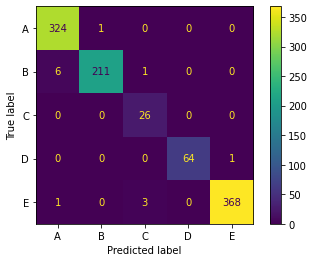

--------------------------------------------
Model: SVM
            Valor
Accuracy   0.9821
F1         0.9731
Precision  0.9899
Recall     0.9582

[[320   0   0   0   5]
 [  0 211   0   0   7]
 [  0   2  23   0   1]
 [  0   0   0  62   3]
 [  0   0   0   0 372]]

              precision    recall  f1-score      support
A              1.000000  0.984615  0.992248   325.000000
B              0.990610  0.967890  0.979118   218.000000
C              1.000000  0.884615  0.938776    26.000000
D              1.000000  0.953846  0.976378    65.000000
E              0.958763  1.000000  0.978947   372.000000
accuracy       0.982107  0.982107  0.982107     0.982107
macro avg      0.989875  0.958193  0.973093  1006.000000
weighted avg   0.982717  0.982107  0.982077  1006.000000



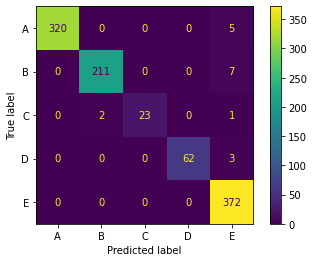

--------------------------------------------
Model: MLP
            Valor
Accuracy   0.3231
F1         0.0977
Precision  0.0646
Recall     0.2000

[[325   0   0   0   0]
 [218   0   0   0   0]
 [ 26   0   0   0   0]
 [ 65   0   0   0   0]
 [372   0   0   0   0]]

              precision    recall  f1-score      support
A              0.323062  1.000000  0.488355   325.000000
B              0.000000  0.000000  0.000000   218.000000
C              0.000000  0.000000  0.000000    26.000000
D              0.000000  0.000000  0.000000    65.000000
E              0.000000  0.000000  0.000000   372.000000
accuracy       0.323062  0.323062  0.323062     0.323062
macro avg      0.064612  0.200000  0.097671  1006.000000
weighted avg   0.104369  0.323062  0.157769  1006.000000



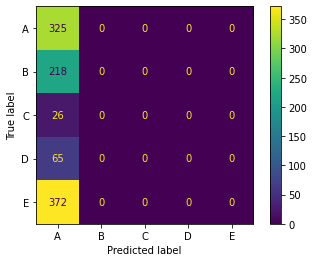

--------------------------------------------
Model: DTC
            Valor
Accuracy   0.9841
F1         0.9665
Precision  0.9733
Recall     0.9600

[[320   5   0   0   0]
 [  3 213   2   0   0]
 [  0   3  23   0   0]
 [  0   0   0  62   3]
 [  0   0   0   0 372]]

              precision    recall  f1-score      support
A              0.990712  0.984615  0.987654   325.000000
B              0.963801  0.977064  0.970387   218.000000
C              0.920000  0.884615  0.901961    26.000000
D              1.000000  0.953846  0.976378    65.000000
E              0.992000  1.000000  0.995984   372.000000
accuracy       0.984095  0.984095  0.984095     0.984095
macro avg      0.973303  0.960028  0.966473  1006.000000
weighted avg   0.984129  0.984095  0.984049  1006.000000



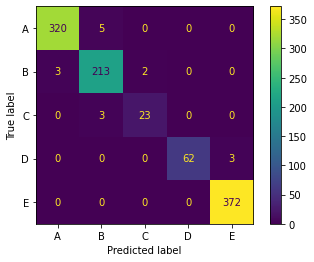

--------------------------------------------


In [6]:
engine.plot_results(base_padrao_predict, X_test, y_test)

### FEATURE SELECTION WITH SequentialFeatureSelector 

In [7]:
sfs_predict = []

# LOGISTIC REGRESSION
lr_X_train, lr_X_test, lr_y_train, lr_y_test = engine.create_train_test(df, features=get_lr_features())
lr_predict = engine.fit_and_predict(lr_X_train, lr_X_test, lr_y_train, lr_y_test, state="SFS")
lr_predict = lr_predict[0:1][0] # Somente o LR interessa
sfs_predict.append(lr_predict)

# SUPORT VECTOR MACHINES
svm_X_train, svm_X_test, svm_y_train, svm_y_test = engine.create_train_test(df, features=get_svm_features())
svm_predict = engine.fit_and_predict(svm_X_train, svm_X_test, svm_y_train, svm_y_test, state="SFS")
svm_predict = svm_predict[1:2][0] # Somente o SVM interessa
sfs_predict.append(svm_predict)

# MULTILAYER PERCEPTRON
mlp_X_train, mlp_X_test, mlp_y_train, mlp_y_test = engine.create_train_test(df, features=get_mpl_features())
mpl_predict = engine.fit_and_predict(mlp_X_train, mlp_X_test, mlp_y_train, mlp_y_test, state="SFS")
mpl_predict = mpl_predict[2:3][0] # Somente o mpl interessa
sfs_predict.append(mpl_predict)


# MULTILAYER PERCEPTRON
iso_dtc_X_train, iso_dtc_X_test, iso_dtc_y_train, iso_dtc_y_test = engine.create_train_test(df, features=get_dtc_features())
dtc_predict = engine.fit_and_predict(iso_dtc_X_train, iso_dtc_X_test, iso_dtc_y_train, iso_dtc_y_test, state="SFS")
dtc_predict = dtc_predict[3:4][0] # Somente o mpl interessa
sfs_predict.append(dtc_predict)

Model: LR
            Valor
Accuracy   0.9672
F1         0.9386
Precision  0.9375
Recall     0.9404

[[320   5   0   0   0]
 [ 10 203   4   0   1]
 [  1   4  21   0   0]
 [  0   0   0  65   0]
 [  1   3   0   4 364]]

              precision    recall  f1-score      support
A              0.963855  0.984615  0.974125   325.000000
B              0.944186  0.931193  0.937644   218.000000
C              0.840000  0.807692  0.823529    26.000000
D              0.942029  1.000000  0.970149    65.000000
E              0.997260  0.978495  0.987788   372.000000
accuracy       0.967197  0.967197  0.967197     0.967197
macro avg      0.937466  0.940399  0.938647  1006.000000
weighted avg   0.967334  0.967197  0.967123  1006.000000



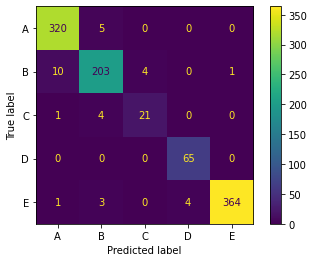

--------------------------------------------
Model: SVM
            Valor
Accuracy   0.9831
F1         0.9751
Precision  0.9853
Recall     0.9657

[[323   0   0   0   2]
 [  2 210   0   0   6]
 [  0   1  24   0   1]
 [  0   0   0  62   3]
 [  0   0   0   2 370]]

              precision    recall  f1-score      support
A              0.993846  0.993846  0.993846   325.000000
B              0.995261  0.963303  0.979021   218.000000
C              1.000000  0.923077  0.960000    26.000000
D              0.968750  0.953846  0.961240    65.000000
E              0.968586  0.994624  0.981432   372.000000
accuracy       0.983101  0.983101  0.983101     0.983101
macro avg      0.985289  0.965739  0.975108  1006.000000
weighted avg   0.983350  0.983101  0.983062  1006.000000



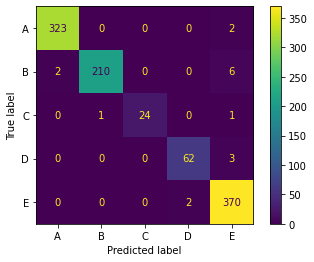

--------------------------------------------
Model: MLP
            Valor
Accuracy   0.3280
F1         0.1051
Precision  0.3316
Recall     0.2030

[[324   1   0   0   0]
 [217   1   0   0   0]
 [ 25   1   0   0   0]
 [ 65   0   0   0   0]
 [367   0   0   0   5]]

              precision    recall  f1-score      support
A              0.324649  0.996923  0.489796   325.000000
B              0.333333  0.004587  0.009050   218.000000
C              0.000000  0.000000  0.000000    26.000000
D              0.000000  0.000000  0.000000    65.000000
E              1.000000  0.013441  0.026525   372.000000
accuracy       0.328032  0.328032  0.328032     0.328032
macro avg      0.331597  0.202990  0.105074  1006.000000
weighted avg   0.546896  0.328032  0.170004  1006.000000



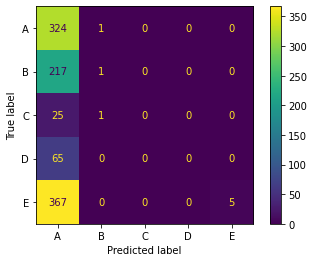

--------------------------------------------
Model: DTC
            Valor
Accuracy   0.8410
F1         0.7086
Precision  0.7119
Recall     0.7056

[[279  40   4   0   2]
 [ 44 157  15   0   2]
 [  3  16   7   0   0]
 [  0   0   0  47  18]
 [  1   0   0  15 356]]

              precision    recall  f1-score      support
A              0.853211  0.858462  0.855828   325.000000
B              0.737089  0.720183  0.728538   218.000000
C              0.269231  0.269231  0.269231    26.000000
D              0.758065  0.723077  0.740157    65.000000
E              0.941799  0.956989  0.949333   372.000000
accuracy       0.840954  0.840954  0.840954     0.840954
macro avg      0.711879  0.705588  0.708618  1006.000000
weighted avg   0.839565  0.840954  0.840187  1006.000000



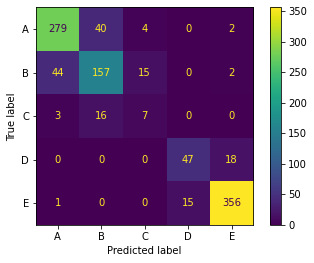

--------------------------------------------


In [8]:
engine.plot_results([sfs_predict[0]], lr_X_test, lr_y_test)
engine.plot_results([sfs_predict[1]], svm_X_test, svm_y_test)
engine.plot_results([sfs_predict[2]], mlp_X_test, mlp_y_test)
engine.plot_results([sfs_predict[3]], iso_dtc_X_test, iso_dtc_y_test)

### ISOLATION FOREST

In [9]:
iso = IsolationForest(contamination=0.05)
predict = iso.fit_predict(df.iloc[:, 0:-1])

mask = predict != -1

iso_X_train, iso_X_test, iso_y_train, iso_y_test = engine.create_train_test(df.iloc[mask])

isolation_predict = engine.fit_and_predict(iso_X_train, iso_X_test, iso_y_train, iso_y_test, state="ISO")

Model: LR
            Valor
Accuracy   0.9979
F1         0.9931
Precision  0.9881
Recall     0.9984

[[347   0   0   0   0]
 [  0 208   1   0   0]
 [  0   0  22   0   0]
 [  0   0   0  61   0]
 [  0   0   0   1 316]]

              precision    recall  f1-score     support
A              1.000000  1.000000  1.000000  347.000000
B              1.000000  0.995215  0.997602  209.000000
C              0.956522  1.000000  0.977778   22.000000
D              0.983871  1.000000  0.991870   61.000000
E              1.000000  0.996845  0.998420  317.000000
accuracy       0.997908  0.997908  0.997908    0.997908
macro avg      0.988079  0.998412  0.993134  956.000000
weighted avg   0.997970  0.997908  0.997922  956.000000



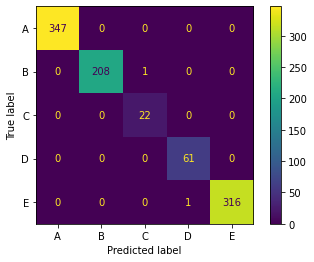

--------------------------------------------
Model: SVM
            Valor
Accuracy   0.9969
F1         0.9876
Precision  0.9949
Recall     0.9812

[[347   0   0   0   0]
 [  0 209   0   0   0]
 [  0   2  20   0   0]
 [  0   0   0  61   0]
 [  0   0   0   1 316]]

              precision    recall  f1-score     support
A              1.000000  1.000000  1.000000  347.000000
B              0.990521  1.000000  0.995238  209.000000
C              1.000000  0.909091  0.952381   22.000000
D              0.983871  1.000000  0.991870   61.000000
E              1.000000  0.996845  0.998420  317.000000
accuracy       0.996862  0.996862  0.996862    0.996862
macro avg      0.994878  0.981187  0.987582  956.000000
weighted avg   0.996899  0.996862  0.996821  956.000000



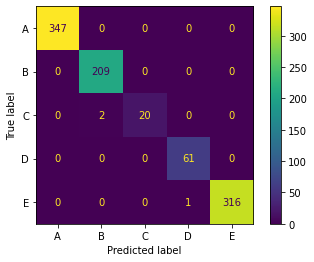

--------------------------------------------
Model: MLP
            Valor
Accuracy   0.3630
F1         0.1065
Precision  0.0726
Recall     0.2000

[[347   0   0   0   0]
 [209   0   0   0   0]
 [ 22   0   0   0   0]
 [ 61   0   0   0   0]
 [317   0   0   0   0]]

              precision    recall  f1-score     support
A              0.362971  1.000000  0.532617  347.000000
B              0.000000  0.000000  0.000000  209.000000
C              0.000000  0.000000  0.000000   22.000000
D              0.000000  0.000000  0.000000   61.000000
E              0.000000  0.000000  0.000000  317.000000
accuracy       0.362971  0.362971  0.362971    0.362971
macro avg      0.072594  0.200000  0.106523  956.000000
weighted avg   0.131748  0.362971  0.193324  956.000000



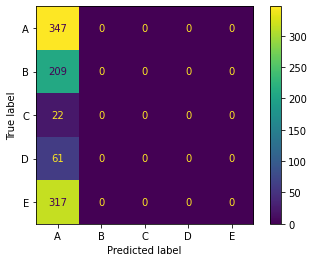

--------------------------------------------
Model: DTC
            Valor
Accuracy   0.9864
F1         0.9772
Precision  0.9680
Recall     0.9874

[[344   3   0   0   0]
 [  4 203   2   0   0]
 [  0   0  22   0   0]
 [  0   0   0  60   1]
 [  0   0   0   3 314]]

              precision    recall  f1-score     support
A              0.988506  0.991354  0.989928  347.000000
B              0.985437  0.971292  0.978313  209.000000
C              0.916667  1.000000  0.956522   22.000000
D              0.952381  0.983607  0.967742   61.000000
E              0.996825  0.990536  0.993671  317.000000
accuracy       0.986402  0.986402  0.986402    0.986402
macro avg      0.967963  0.987358  0.977235  956.000000
weighted avg   0.986635  0.986402  0.986446  956.000000



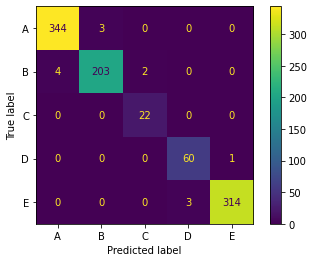

--------------------------------------------


In [10]:
engine.plot_results(isolation_predict, iso_X_test, iso_y_test)

### ISOLATION FOREST + SFS

In [11]:
iso_sfs_predict = []

# LOGISTIC REGRESSION
iso_lr_X_train, iso_lr_X_test, iso_lr_y_train, iso_lr_y_test = engine.create_train_test(df.iloc[mask], features=get_lr_features())
iso_lr_predict = engine.fit_and_predict(iso_lr_X_train, iso_lr_X_test, iso_lr_y_train, iso_lr_y_test, state="ISO_SFS")
iso_lr_predict = iso_lr_predict[0:1][0] # Somente o LR interessa
iso_sfs_predict.append(iso_lr_predict)

# SUPORT VECTOR MACHINES
iso_svm_X_train, iso_svm_X_test, iso_svm_y_train, iso_svm_y_test = engine.create_train_test(df.iloc[mask], features=get_svm_features())
iso_svm_predict = engine.fit_and_predict(iso_svm_X_train, iso_svm_X_test, iso_svm_y_train, iso_svm_y_test, state="ISO_SFS")
iso_svm_predict = iso_svm_predict[1:2][0] # Somente o SVM interessa
iso_sfs_predict.append(iso_svm_predict)

# MULTILAYER PERCEPTRON
iso_mlp_X_train, iso_mlp_X_test, iso_mlp_y_train, iso_mlp_y_test = engine.create_train_test(df.iloc[mask], features=get_mpl_features())
iso_mlp_predict = engine.fit_and_predict(iso_mlp_X_train, iso_mlp_X_test, iso_mlp_y_train, iso_mlp_y_test, state="ISO_SFS")
iso_mlp_predict = iso_mlp_predict[2:3][0] # Somente o mpl interessa
iso_sfs_predict.append(iso_mlp_predict)


# DECITION TREE CLASSFIED
iso_sfs_dtc_X_train, iso_sfs_dtc_X_test, iso_sfs_dtc_y_train, iso_sfs_dtc_y_test = engine.create_train_test(df.iloc[mask], features=get_dtc_features())
iso_dtc_predict = engine.fit_and_predict(
    iso_sfs_dtc_X_train, iso_sfs_dtc_X_test, iso_sfs_dtc_y_train, iso_sfs_dtc_y_test, state="ISO_SFS")
iso_dtc_predict = iso_dtc_predict[3:4][0] # Somente o mpl interessa
iso_sfs_predict.append(iso_dtc_predict)

Model: LR
            Valor
Accuracy   0.9812
F1         0.9673
Precision  0.9531
Recall     0.9854

[[341   6   0   0   0]
 [  6 198   5   0   0]
 [  0   0  22   0   0]
 [  0   0   0  61   0]
 [  1   0   0   0 316]]

              precision    recall  f1-score     support
A              0.979885  0.982709  0.981295  347.000000
B              0.970588  0.947368  0.958838  209.000000
C              0.814815  1.000000  0.897959   22.000000
D              1.000000  1.000000  1.000000   61.000000
E              1.000000  0.996845  0.998420  317.000000
accuracy       0.981172  0.981172  0.981172    0.981172
macro avg      0.953058  0.985385  0.967302  956.000000
weighted avg   0.982007  0.981172  0.981340  956.000000



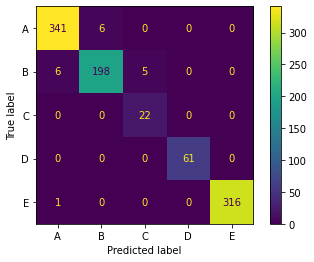

--------------------------------------------
Model: SVM
            Valor
Accuracy   0.9948
F1         0.9895
Precision  0.9915
Recall     0.9877

[[347   0   0   0   0]
 [  2 207   0   0   0]
 [  0   1  21   0   0]
 [  0   0   0  61   0]
 [  0   0   0   2 315]]

              precision    recall  f1-score    support
A              0.994269  1.000000  0.997126  347.00000
B              0.995192  0.990431  0.992806  209.00000
C              1.000000  0.954545  0.976744   22.00000
D              0.968254  1.000000  0.983871   61.00000
E              1.000000  0.993691  0.996835  317.00000
accuracy       0.994770  0.994770  0.994770    0.99477
macro avg      0.991543  0.987733  0.989477  956.00000
weighted avg   0.994843  0.994770  0.994771  956.00000



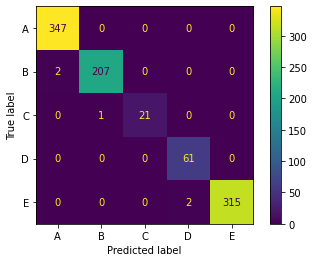

--------------------------------------------
Model: MLP
            Valor
Accuracy   0.3630
F1         0.1065
Precision  0.0726
Recall     0.2000

[[347   0   0   0   0]
 [209   0   0   0   0]
 [ 22   0   0   0   0]
 [ 61   0   0   0   0]
 [317   0   0   0   0]]

              precision    recall  f1-score     support
A              0.362971  1.000000  0.532617  347.000000
B              0.000000  0.000000  0.000000  209.000000
C              0.000000  0.000000  0.000000   22.000000
D              0.000000  0.000000  0.000000   61.000000
E              0.000000  0.000000  0.000000  317.000000
accuracy       0.362971  0.362971  0.362971    0.362971
macro avg      0.072594  0.200000  0.106523  956.000000
weighted avg   0.131748  0.362971  0.193324  956.000000



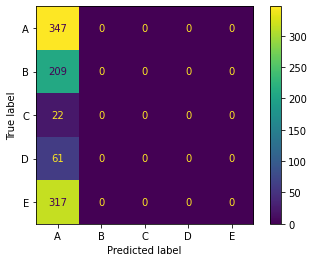

--------------------------------------------
Model: DTC
            Valor
Accuracy   0.8598
F1         0.7360
Precision  0.7312
Recall     0.7419

[[305  37   4   0   1]
 [ 39 158  11   0   1]
 [  4  12   6   0   0]
 [  2   0   0  52   7]
 [  0   0   0  16 301]]

              precision    recall  f1-score     support
A              0.871429  0.878963  0.875179  347.000000
B              0.763285  0.755981  0.759615  209.000000
C              0.285714  0.272727  0.279070   22.000000
D              0.764706  0.852459  0.806202   61.000000
E              0.970968  0.949527  0.960128  317.000000
accuracy       0.859833  0.859833  0.859833    0.859833
macro avg      0.731220  0.741931  0.736039  956.000000
weighted avg   0.860504  0.859833  0.859964  956.000000



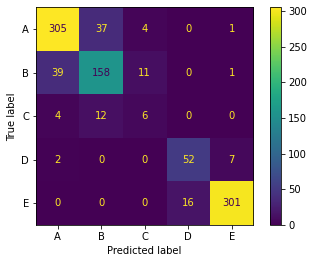

--------------------------------------------


In [12]:
engine.plot_results([iso_sfs_predict[0]], iso_lr_X_test, iso_lr_y_test)
engine.plot_results([iso_sfs_predict[1]], iso_svm_X_test, iso_svm_y_test)
engine.plot_results([iso_sfs_predict[2]], iso_mlp_X_test, iso_mlp_y_test)
engine.plot_results([iso_sfs_predict[3]], iso_sfs_dtc_X_test, iso_sfs_dtc_y_test)

### COMPARACAO DE RESULTADOS

In [13]:
# Unificando os resultados em um unico DF
resultados_df = pd.concat([
    pd.DataFrame(base_padrao_predict),
    pd.DataFrame(sfs_predict),
    pd.DataFrame(isolation_predict),
    pd.DataFrame(iso_sfs_predict),
])

                   classificador                       tecnica  accuracy  \
0            Regressão Logística                       Inicial    0.9871   
0            Regressão Logística        Floresta de Isolamento    0.9979   
0            Regressão Logística   Sequential Feature Selector    0.9672   
0            Regressão Logística  SFS + Floresta de Isolamento    0.9812   
1  Máquina de Vetores de Suporte                       Inicial    0.9821   
1  Máquina de Vetores de Suporte        Floresta de Isolamento    0.9969   
1  Máquina de Vetores de Suporte   Sequential Feature Selector    0.9831   
1  Máquina de Vetores de Suporte  SFS + Floresta de Isolamento    0.9948   
2        Perceptron Multicamadas                       Inicial    0.3231   
2        Perceptron Multicamadas        Floresta de Isolamento    0.3630   
2        Perceptron Multicamadas   Sequential Feature Selector    0.3280   
2        Perceptron Multicamadas  SFS + Floresta de Isolamento    0.3630   
3           

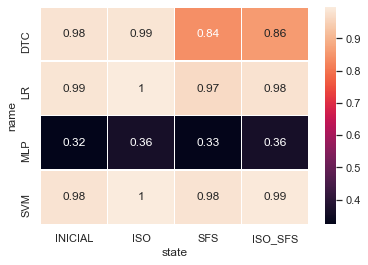

In [14]:
engine.plot_final_results(resultados_df)